<a href="https://colab.research.google.com/github/nithingooud/nithingooud/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#get the data from
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

#unzip the data
!unzip train.zip?dl=0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

**Building our model to train the data**


In [3]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [9]:
#all the layers of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

 **Preparing our data using data generator**

---



In [6]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


**visualizaing the data that is fed to train data gen**

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

**having early stopping and model check point**

In [11]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [30]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 100, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 22s 2s/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0056 - val_accuracy: 0.9961

Epoch 00001: val_accuracy did not improve from 1.00000
Epoch 2/100
10/10 [==============================] - 22s 2s/step - loss: 0.0267 - accuracy: 0.9875 - val_loss: 0.0093 - val_accuracy: 0.9961

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/100
10/10 [==============================] - 22s 2s/step - loss: 0.0187 - accuracy: 0.9906 - val_loss: 5.8571e-04 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/100
10/10 [==============================] - 22s 2s/step - loss: 0.0126 - accuracy: 0.9937 - val_loss: 0.0126 - val_accuracy: 0.9961

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/100
10/10 [==============================] - 22s 2s/step - loss: 0.0450 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000

Epoch 00005: val_accuracy did not improve from 1.00000
Epoch 6/100

In [13]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [14]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

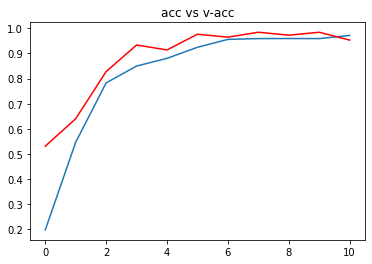

In [15]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

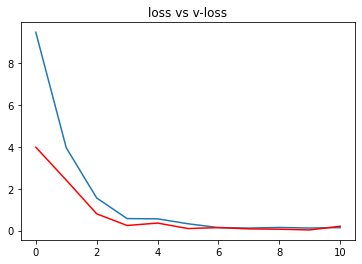

In [16]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [17]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of Happy


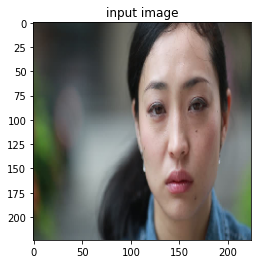

In [31]:
# path for the image to see if it predics correct class

path = "/content/12.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()